Önüne düştü
Önüne düştü
Önüne düştü
Uzağına düştü
Uzağına düştü
Uzağına düştü
Hedefi vurdun
7. seferde vuruş gerçekleşmiştir. Hedefi vurmak için gerekli hız 502.265625 m/s
Şekli Çizdiriyorum


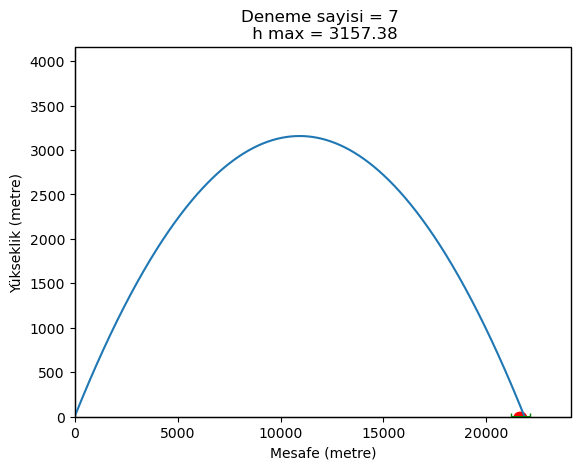

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

from matplotlib import patches


# Press the green button in the gutter to run the script.
def main_function(ball_location=None, velocity_min_limit=330, velocity_max_limit=1800):
    if ball_location is None:
        ball_location = [0, 4]  # öğrenci numaram 22040201004 olduğu için
    g = 10
    # topun konumu
    uzaklık_mesafesi = 20000 + 200 * random.randint(-10, 10)
    genislik_baslangic = uzaklık_mesafesi
    genişlik_bitiş = genislik_baslangic + 1000 + 100 * random.randint(-2, 2)

    target_location = [(genislik_baslangic + genişlik_bitiş) / 2, 0]

    hiz = (velocity_min_limit + velocity_max_limit) / 2

    try:
        atis_sayisi, hiz_x, hiz_y, max_atis, yukseklik = hedef_vurulma_durumu(ball_location, g,
                                                                              genislik_baslangic,
                                                                              genişlik_bitiş, hiz,
                                                                              velocity_max_limit,
                                                                              velocity_min_limit)
    except Exception as ex:
        print(ex)
        return

    mesafe_list, yukseklik_list = mesafe_yukseklik_hesapla(ball_location, g, hiz_x, hiz_y)
    # Grafik çizdirme
    draw(atis_sayisi, yukseklik, genislik_baslangic, genişlik_bitiş, target_location, mesafe_list, yukseklik_list)


def mesafe_yukseklik_hesapla(ball_location, g, hiz_x, hiz_y):
    mesafe_list = []
    yukseklik_list = []
    t = 0
    while True:
        x = hiz_x * t
        y = hiz_y * t - (1 / 2) * g * (t ** 2) + ball_location[1]
        if y < 0:
            break
        mesafe_list.append(x)
        yukseklik_list.append(y)
        t += 0.01
    return mesafe_list, yukseklik_list


def hedef_vurulma_durumu(ball_location, g, genislik_baslangic, genişlik_bitiş, hiz, velocity_max_limit,
                         velocity_min_limit):
    hedef_vuruldu_mu = False
    atis_sayisi = 0
    max_atis = 20
    yukseklik = 0
    hiz_x = 0
    hiz_y = 0
    while not hedef_vuruldu_mu and atis_sayisi < max_atis:
        atis_sayisi += 1

        aci = 30  # derece
        hiz_x = hiz * math.cos(math.radians(aci))
        hiz_y = hiz * math.sin(math.radians(aci))

        yukseklik = hiz_y * hiz_y / (2 * g) + ball_location[1]
        t_cikis = hiz_y / g
        t_inis = math.sqrt(2 * yukseklik / g)
        t_total = t_inis + t_cikis
        x = hiz_x * t_total

        # print("hiz_x=>", hiz_x)
        # print("hiz_y=>", hiz_y)
        # print("yukseklik=>", yukseklik)
        # print("t_cikis=>", t_cikis)
        # print("t_inis=>", t_inis)
        # print("t_total=>", t_total)
        # print("x=>", x)
        if x < genislik_baslangic:
            print("Uzağına düştü")
            velocity_min_limit = hiz
            hiz = (hiz + velocity_max_limit) / 2
        else:
            if x > genişlik_bitiş:
                print("Önüne düştü")
                velocity_max_limit = hiz
                hiz = (hiz + velocity_min_limit) / 2
            else:
                print("Hedefi vurdun", )
                hedef_vuruldu_mu = True
                print(f"{atis_sayisi}. seferde vuruş gerçekleşmiştir. Hedefi vurmak için gerekli hız {hiz} m/s")
        # print("-----------------------------------")
    if not hedef_vuruldu_mu:
        raise Exception("Hedef  {}  defa atışta vurulamadı".format(max_atis))
    return atis_sayisi, hiz_x, hiz_y, max_atis, yukseklik


def draw(atis_sayisi, hmax, genislik_baslangic, genişlik_bitiş, target_location, x_values, y_values):
    print("Şekli Çizdiriyorum")
    fig, ax = plt.subplots()
    ball_radius = 100
    y_ignore = 2000  # y eksenini daha geniş tutmak için
    x_ignore = 1000  # x exsenini daha geniş tutmak için
    ax.set_xlabel('Mesafe (metre)')
    ax.set_ylabel('Yükseklik (metre)')
    ax.set_title(f'Deneme sayisi = {atis_sayisi} \n h max = {round(hmax, 2)}')
    ax.set_xlim(0, genişlik_bitiş + y_ignore)
    ax.set_ylim(0, hmax + x_ignore)
    # x ve y ekseni eşit büyüklükte olmadığından dolayı bu ratio ile daha sonra topu düzgün çizdirebiliyoruz
    ratio = (genişlik_bitiş + y_ignore) / (hmax + x_ignore)
    # x ve y eksenlerini birleştir
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.plot(x_values, y_values)
    # kırmızı topu çizdirebilmek için
    ball = patches.Ellipse((target_location[0], target_location[1]), width=ball_radius * ratio, height=ball_radius,
                           color="red")
    ax.add_patch(ball, )

    # hedef başlangıç ve bitişi çizdirmek içn
    plt.errorbar(genislik_baslangic + (genişlik_bitiş - genislik_baslangic) / 2, 0,
                 xerr=[(genişlik_bitiş - genislik_baslangic) / 2],
                 fmt='o', markersize=0, capsize=3, ecolor="green")
    # Frame çerçevesi çizdirmek ve rengini ayarlamak için
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')
    plt.show()


if __name__ == '__main__':
    # kod buradan çalışmaya başlar
    main_function(velocity_min_limit=330, velocity_max_limit=1800)
